In [1]:

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline 
import geopandas as gpf
import warnings
warnings.filterwarnings("ignore")

sns.set()

#### Question 1 & 4 Loading the Dataset 
note that initial co2 dataset will be used for EDA and then the final cleaned dataset will be utilized 


In [2]:

co2=pd.read_csv('co2_emission.csv')

#### Question 2 A cursory examination of the CSV file and 5) exploratory data analysis

In [3]:
""" dataset columns"""
co2.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source', 'Unnamed: 7'],
      dtype='object')

In [4]:
""" checking the first and last rows"""
co2

,Region/Country/Area,country,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN,"International Energy Agency, IEA World Energy ...",NaN
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN,"International Energy Agency, IEA World Energy ...",NaN
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN,"International Energy Agency, IEA World Energy ...",NaN
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN,"International Energy Agency, IEA World Energy ...",NaN
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN,"International Energy Agency, IEA World Energy ...",NaN
...,...,...,...,...,...,...,...,...
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ...",NaN
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ...",NaN
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ...",NaN
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ...",NaN


In [5]:
"""

"""

'\n\n'

In [6]:
"""
Checking the basic dataset information
"""
print("==columns==")
print(co2.columns.to_list())
print('\n===info==\n')
co2.info()

==columns==
['Region/Country/Area', 'country', 'Year', 'Series', 'Value', 'Footnotes', 'Source', 'Unnamed: 7']

===info==

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2264 non-null   int64  
 1   country              2264 non-null   object 
 2   Year                 2264 non-null   int64  
 3   Series               2264 non-null   object 
 4   Value                2264 non-null   float64
 5   Footnotes            256 non-null    object 
 6   Source               2264 non-null   object 
 7   Unnamed: 7           32 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 141.6+ KB


###### observations from above,  the dataset has int (2 cols), float (one col) and object (five cols) datatype

In [7]:
## checking unique values to help understand more the dataset
print(len(co2['Series'].unique()))
co2['Series'].unique()

2


array(['Emissions (thousand metric tons of carbon dioxide)',
       'Emissions per capita (metric tons of carbon dioxide)'],
      dtype=object)

In [8]:
print(len(co2['Footnotes'].unique()))
co2['Footnotes'].unique()

14


array([nan, 'Data refer to fiscal years beginning 1 July.',
       'For statistical purposes, the data for China do not include those for the Hong Kong Special Administrative Region (Hong Kong SAR), Macao Special Administrative Region (Macao SAR) and Taiwan Province of China.',
       'Excluding northern Cyprus.', 'Refers to Czechia and Slovakia.',
       'Excluding the Faroe Islands and Greenland.',
       'From 2011 onwards, data include Monaco, and the five overseas departments and exclude New Caledonia, French Polynesia, St. Barth�lemy, St. Martin, St. Pierre and Miquelon, and Wallis and Futuna.',
       'Data refer to fiscal years beginning 1 April.',
       'Data refer to fiscal years beginning 21 March.',
       'Data include San Marino and the Holy See.',
       'Data include Okinawa.', 'Data includes the Azores and Madeira.',
       'The Government of Ukraine has informed the United Nations that it is not in a position to provide statistical data concerning the Autonomous Repu

In [9]:
print(len(co2['Unnamed: 7'].unique()))
co2['Unnamed: 7'].unique()

2


array([nan,
       'International Energy Agency, IEA World Energy Balances 2021 and 2006 IPCC Guidelines for Greenhouse Gas Inventories, last accessed April 2023.'],
      dtype=object)

In [10]:
print(len(co2['Region/Country/Area'].unique()))
co2['Region/Country/Area'].unique()

149


array([  8,  12,  24,  32,  51,  36,  40,  31,  48,  50, 112,  56, 204,
        68,  70,  72,  76,  96, 100, 116, 120, 124, 152, 156, 344, 170,
       178, 188, 384, 191, 192, 531, 196, 203, 408, 180, 208, 214, 218,
       818, 222, 226, 232, 233, 748, 231, 246, 250, 266, 268, 276, 288,
       292, 300, 320, 328, 332, 340, 348, 352, 356, 360, 364, 368, 372,
       376, 380, 388, 392, 400, 398, 404, 412, 414, 417, 418, 428, 422,
       434, 440, 442, 450, 458, 470, 480, 484, 496, 499, 504, 508, 104,
       516, 524, 528, 554, 558, 562, 566, 807, 578, 512, 586, 591, 600,
       604, 608, 616, 620, 634, 410, 498, 642, 643, 646, 682, 686, 688,
       702, 703, 705, 710, 728, 724, 144, 729, 740, 752, 756, 760, 762,
       764, 768, 780, 788, 792, 795, 800, 804, 784, 826, 834, 840, 858,
       860, 862, 704, 887, 894, 716], dtype=int64)

In [11]:
"""
data types
"""
co2.dtypes

Region/Country/Area      int64
country                 object
Year                     int64
Series                  object
Value                  float64
Footnotes               object
Source                  object
Unnamed: 7              object
dtype: object

In [12]:
"""
descriptive statistics 
"""
#GROUP THE DATA INTO categories provided by the series to calculate different statistical values
grouped= co2.groupby('Series')
co2_per_capital = grouped.get_group('Emissions per capita (metric tons of carbon dioxide)')
co2_per_metric= grouped.get_group('Emissions (thousand metric tons of carbon dioxide)')

# describe countries grouped by Emissions per capita (metric tons of carbon dioxide)
co2_per_capital['Value'].describe()

count    1132.000000
mean        4.815194
std         5.827506
min         0.000000
25%         0.800000
50%         3.100000
75%         6.700000
max        60.300000
Name: Value, dtype: float64

In [13]:
#describe countries grouped by Emissions (thousand metric tons of carbon dioxide)
co2_per_metric['Value'].describe()

count    1.132000e+03
mean     1.864666e+05
std      7.961223e+05
min      4.600000e+01
25%      6.564250e+03
50%      2.226750e+04
75%      8.594575e+04
max      1.019064e+07
Name: Value, dtype: float64

In [14]:
"""
checking missing values
"""
co2.isnull().sum()

Region/Country/Area       0
country                   0
Year                      0
Series                    0
Value                     0
Footnotes              2008
Source                    0
Unnamed: 7             2232
dtype: int64

 
Observation from above:Footnotes and unnamed: 7 has significant missing values, they might not be relevant for the task.They can safely be droped out.
 

                       Column: Region/Country/Area


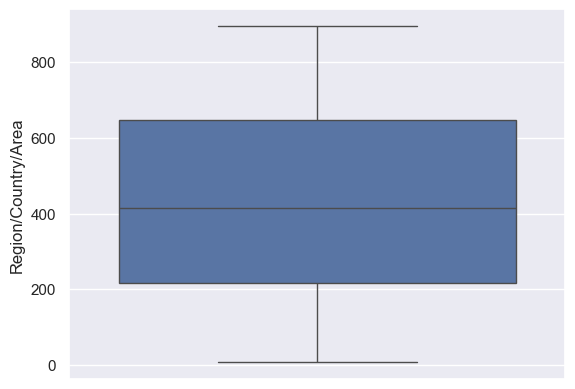

                       Column: Year


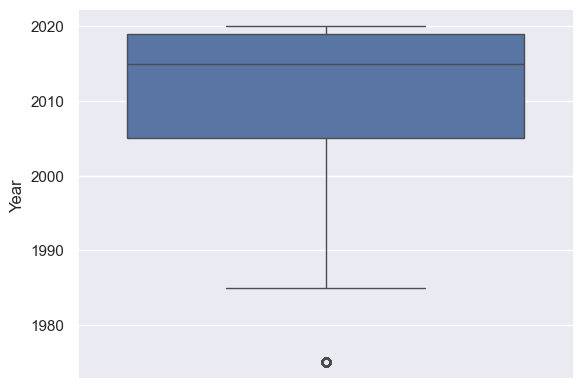

                       Column: Value


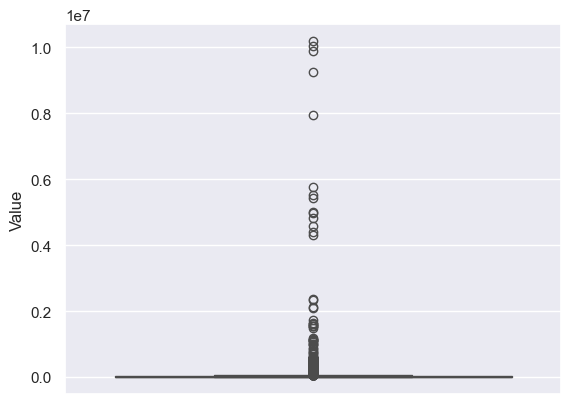

In [15]:
"""
the following codes check whether there are any outliers in the dataset 
for size measurements using seabons boxplot.
"""

from matplotlib import pyplot

import matplotlib.ticker as ticker
cols=['Region/Country/Area','Year','Value']
     
for item in cols: 
    print(f"{'Column:':>30} {item}")
    sns.boxplot(co2[item],orient="vertical")
    pyplot.show()

                       Column: Region/Country/Area


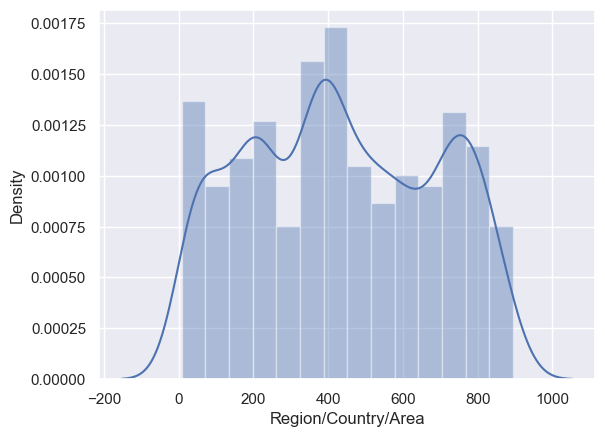

                       Column: Year


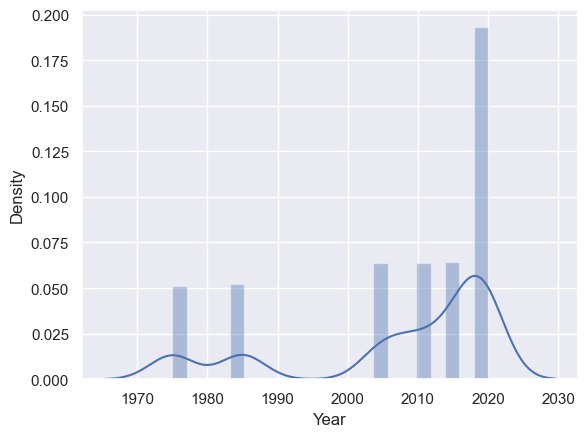

                       Column: Value


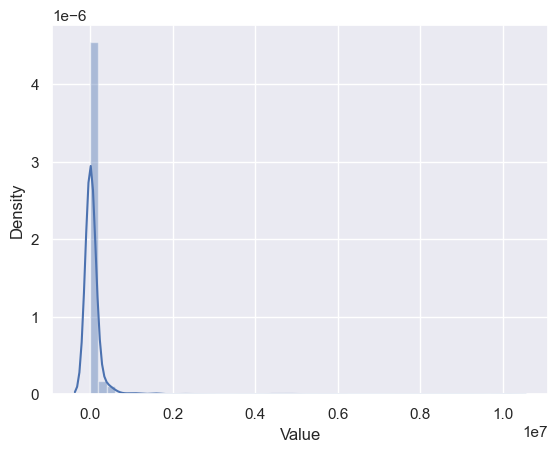

In [16]:
"""
the following codes check whether there are any outliers in the dataset 
for size measurements using seabons distplot.
"""

from matplotlib import pyplot

import matplotlib.ticker as ticker
cols=['Region/Country/Area','Year','Value']
     
for item in cols:  
    print(f"{'Column:':>30} {item}")
    sns.distplot(co2[item])
    pyplot.show()

All two type of graphs above show that the Value feature has some outliers values

##### DATA VISUALIZATION

<Axes: xlabel='Year', ylabel='Value'>

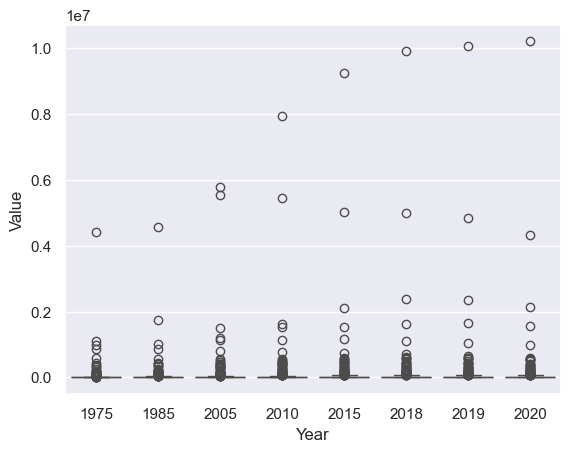

In [17]:
sns.boxplot(x='Year',y='Value',data=co2)

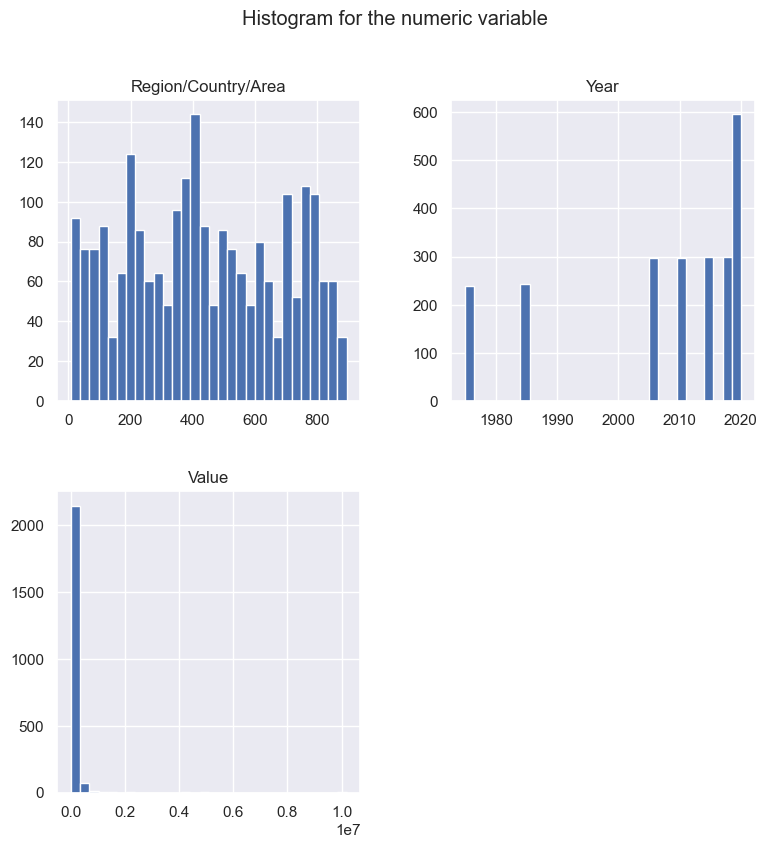

In [18]:
co2.hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for the numeric variable")
plt.savefig('hist')

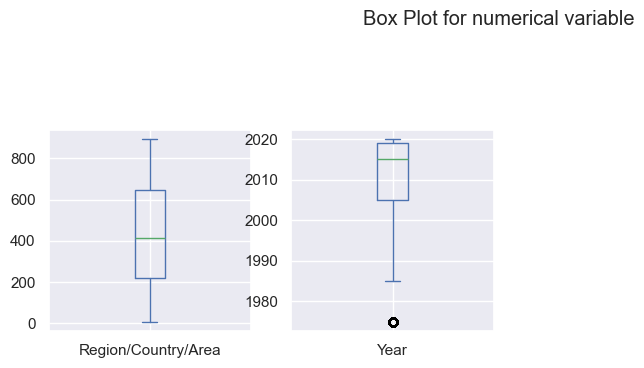

In [19]:
df_without_label = co2.drop('Value', axis=1)
df_without_label.plot(kind='box', subplots=True, layout=(4,4), 
                      sharex=False, sharey=False, 
                      figsize=(12,12),
                      title='Box Plot for numerical variable')
plt.savefig('boxplot')
plt.show()

#### Based on the observations above dataset can be cleaned by
  Removing null values, fixing skewed values and removing outliers.
  
  Then the resulting clean dataset can be used for preceeding tasks

#### Question 3

##### 10 questions
  1. What is the first year of recording emission and the recent year that was recorded, and what is the countries with the highest co2 emission at the beginning of the record and what do they have in common?
  
  2. What are the differences of co2 emission in 2019 and 2020

  3. country with lower co2 emitter, Emission per metric in all years
  
  4) Linear(correlation ) relationship between carbon emission and economic indicator. 
  
  5) Countries with the highest gross metric carbon emission the same as the country with emission per capacitor
  
  6) Which year had the highest global emissions per capita
  
  7) Time series data for carbon emission
  
  8) Impact of Population density  carbon emission
  
  9) Which country has the highest decrease in carbon emission in 2010
  
 10) Correlation between emission per capita vs metric emission metric  on time series plot 

    

## Question 5

### 5.a) Understanding the data- attributes/fields, data types, data size, significant fields,


In [20]:
"""Loading CO2 Dataset and display the basic summary of the dataset(information)"""
CO2_df  = pd.read_csv('SYB66_310_202310_Carbon Dioxide Emission Estimates.csv', encoding='latin1', skiprows = 1)
print('Columns in dataframe: \n',CO2_df.columns)
display(CO2_df.info())
display(CO2_df.head())
display(CO2_df.tail())

Columns in dataframe: 
 Index(['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  2264 non-null   int64 
 1   Unnamed: 1           2264 non-null   object
 2   Year                 2264 non-null   int64 
 3   Series               2264 non-null   object
 4   Value                2264 non-null   object
 5   Footnotes            256 non-null    object
 6   Source               2264 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.9+ KB


None

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980",NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975",NaN,"International Energy Agency, IEA World Energy ..."


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2263,716,Zimbabwe,2020,Emissions per capita (metric tons of carbon di...,0.5,NaN,"International Energy Agency, IEA World Energy ..."


The dataset comprises 2263 rows and 7 columns, with column headers including 'Region/Country/Area,' 'Unnamed: 1,' 'Year,' 'Series,' 'Value,' 'Footnotes,' and 'Source.' The data types range from integers (Region/Country/Area, Year) to strings or objects (Unnamed: 1, Series, Value, Footnotes, Source). Some entries in the 'Footnotes' column are NaN, indicating missing information. The summary provides essential details about the dataset, facilitating an understanding of its composition and data types. The tabular representation showcases a sample of the dataset, emphasizing the presence of both relevant information and NaN values in certain columns.

### 5.b) Understanding the basic statistics and the distribution of numerical data

Basic Statistics for Emissions:


count    1.132000e+03
mean     1.864666e+05
std      7.961223e+05
min      4.600000e+01
25%      6.564250e+03
50%      2.226750e+04
75%      8.594575e+04
max      1.019064e+07
Name: Value, dtype: float64


Basic Statistics for Emissions per Capita:


count    1132.000000
mean        4.815194
std         5.827506
min         0.000000
25%         0.800000
50%         3.100000
75%         6.700000
max        60.300000
Name: Value, dtype: float64

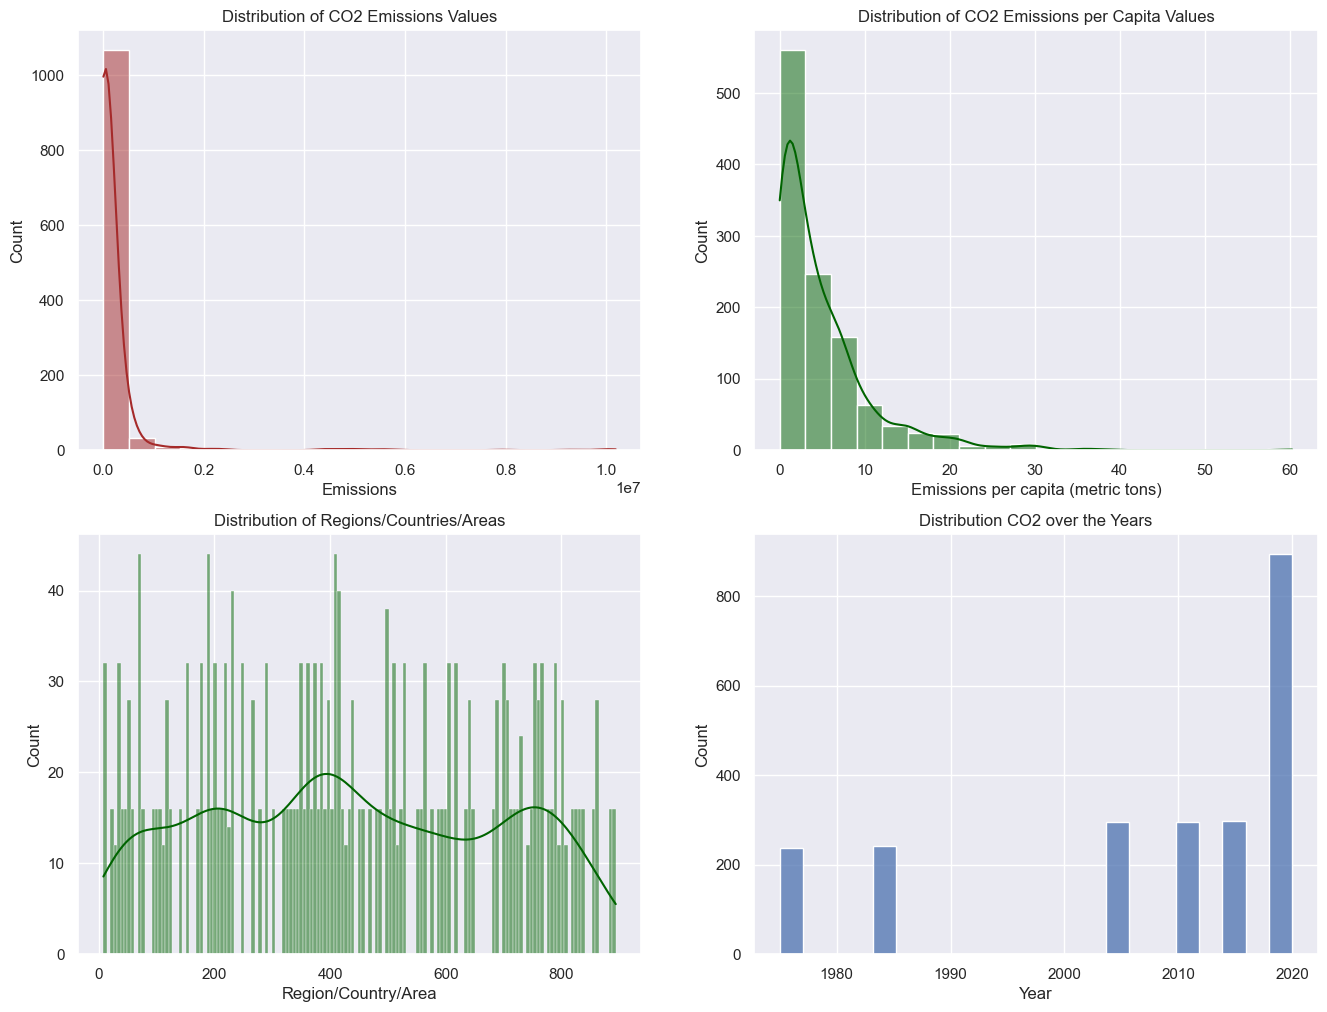

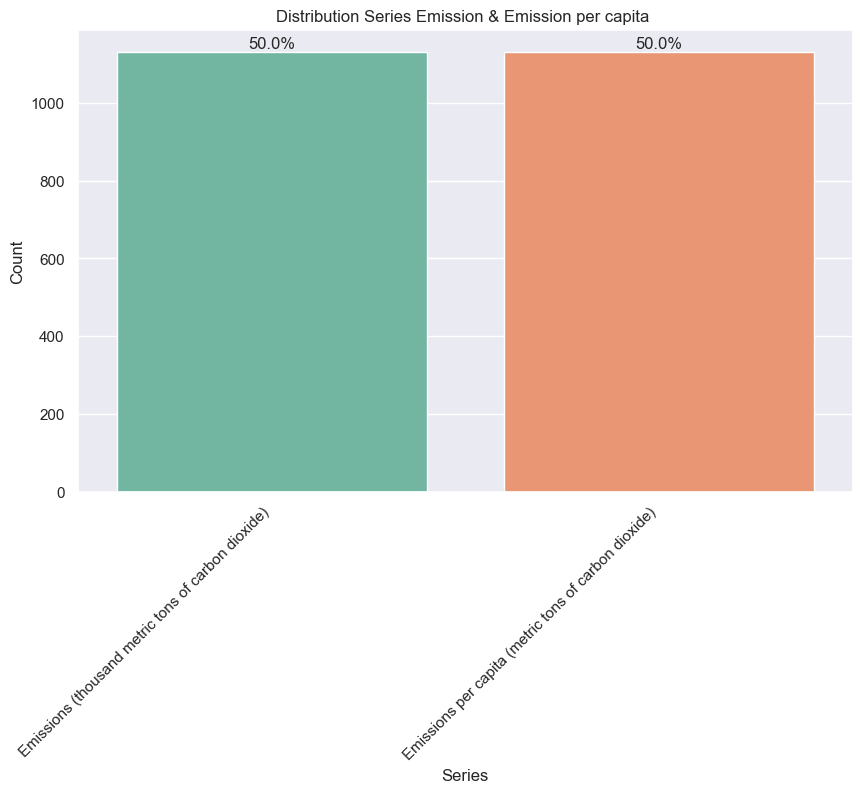

In [21]:
# Extracting the CSV file

CO2_df = pd.read_csv('SYB66_310_202310_Carbon Dioxide Emission Estimates.csv', encoding='ISO-8859-1', skiprows=1)

# Convert dataset From comma separated to float in value column
CO2_df['Value'] = pd.to_numeric(CO2_df['Value'].str.replace(',', ''), errors='coerce')

# Extract the data based on Emission and Emissions per capita
Value_emission = CO2_df[CO2_df['Series'] == 'Emissions (thousand metric tons of carbon dioxide)']
Value_capita = per_capita_data = CO2_df[CO2_df['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']

# Display basic statistics
print("Basic Statistics for Emissions:")
display(Value_emission['Value'].describe())
print("\nBasic Statistics for Emissions per Capita:")
display(Value_capita['Value'].describe())

# Plotting Distribution statistic for numerical column 'Value'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Histogram for Emission values
sns.histplot(Value_emission['Value'], bins=20, kde=True, color='brown', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of CO2 Emissions Values')
axes[0, 0].set_xlabel('Emissions')
axes[0, 0].set_ylabel('Count')

# Histogram for Emission per Capita
sns.histplot(Value_capita['Value'], bins=20, kde=True, color='darkgreen', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of CO2 Emissions per Capita Values')
axes[0, 1].set_xlabel('Emissions per capita (metric tons)')
axes[0, 1].set_ylabel('Count')

# Histogram for Region/Country/Area column
sns.histplot(CO2_df['Region/Country/Area'], color='darkgreen', kde=True, bins=len(CO2_df['Region/Country/Area'].unique()), ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Regions/Countries/Areas')
axes[1, 0].set_xlabel('Region/Country/Area')
axes[1, 0].set_ylabel('Count')

# Plotting Histogram for Years column 
sns.histplot(CO2_df['Year'], palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Distribution CO2 over the Years')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Count')

# plot distribution of Emission in serie
plt.figure(figsize = (10,6))
ax = sns.countplot(x='Series', data=CO2_df, palette='Set2')
plt.title('Distribution Series Emission & Emission per capita ')
plt.xlabel('Series')
plt.ylabel('Count')

# Annotate with percentage labels
total = len(CO2_df)  
for i in ax.patches:
    height = i.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2, height),
                ha='center', va='bottom')

plt.xticks(rotation=45, ha='right') 
plt.show()


The provided code extracts a CSV file into a DataFrame and performs data manipulation and visualization using the Pandas and Seaborn libraries in Python. The dataset is related to carbon dioxide emissions, with columns such as 'Region/Country/Area,' 'Year,' 'Series,' and 'Value.' The 'Value' column is converted to numeric format, and two subsets of data are created for emissions and emissions per capita.

Basic statistics, including count, mean, standard deviation, minimum, maximum, and quartiles, are calculated for both emission types. Subsequently, histograms with kernel density estimation (KDE) are plotted to visually represent the distribution of CO2 emissions and emissions per capita. The histograms provide insights into the variation of emissions values, emissions per capita values, distribution across regions/countries/areas, and the distribution over the years. Additionally, a countplot is generated to show the distribution of different series types within the dataset.

This comprehensive analysis enhances the understanding of the dataset's numerical characteristics and provides visual insights into the distribution patterns of CO2 emissions.

### 5.c) Dataset visualizations

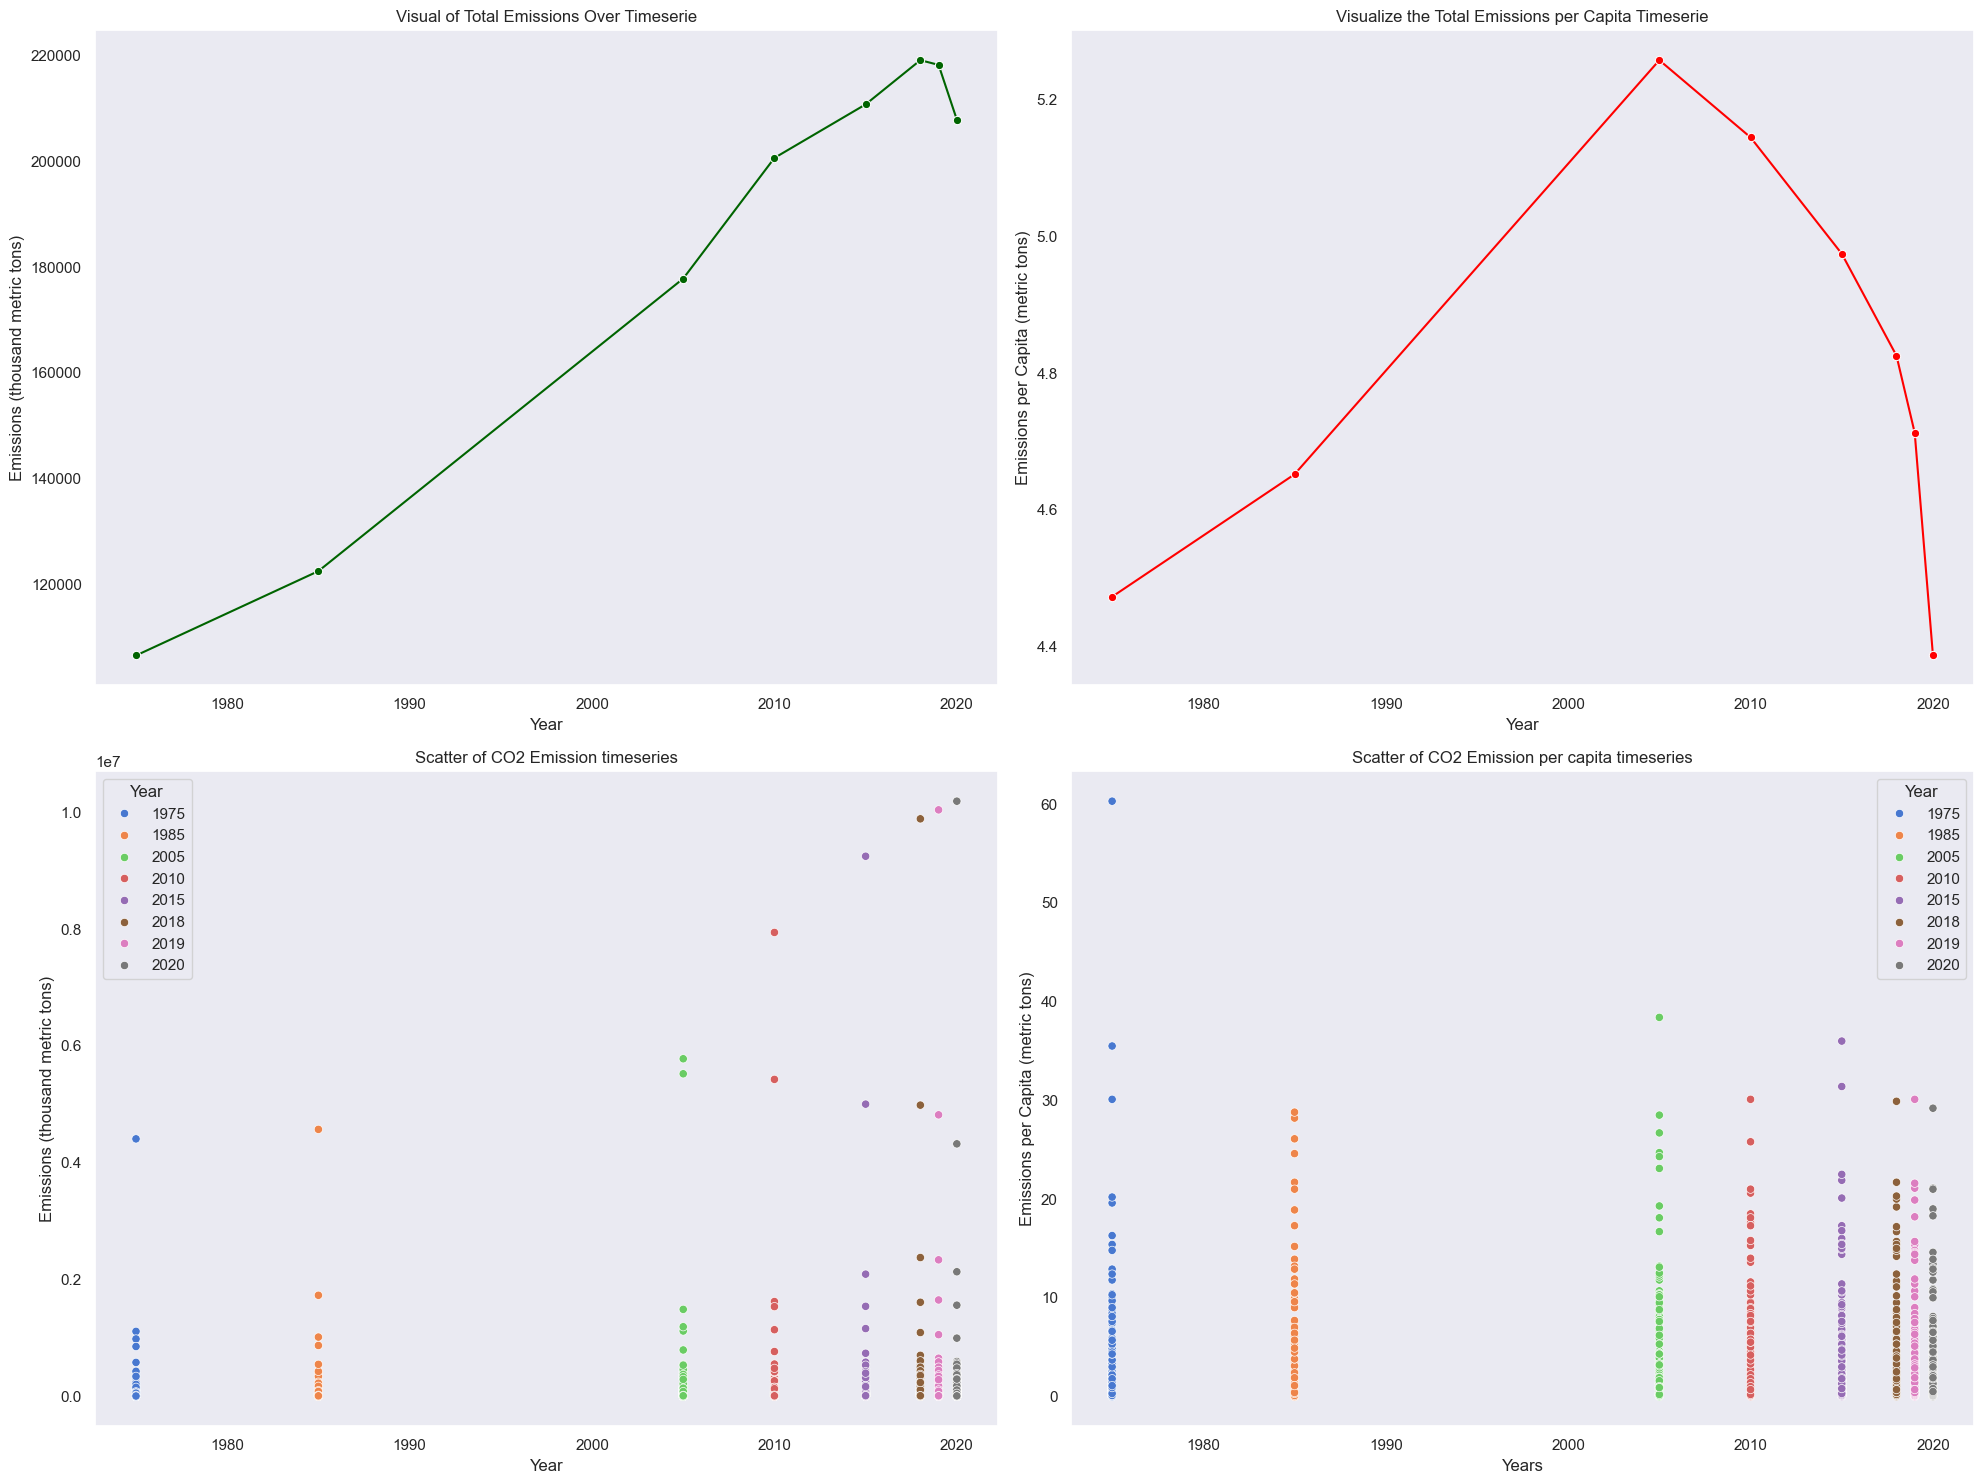

In [22]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
Value_emission = CO2_df[CO2_df['Series'] == 'Emissions (thousand metric tons of carbon dioxide)']
Value_capita = per_capita_data = CO2_df[CO2_df['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']

# Line plot for CO2 total emissions over time
sns.lineplot(x='Year', y='Value', data=Value_emission, ci=None, color='darkgreen', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Visual of Total Emissions Over Timeserie')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Emissions (thousand metric tons)')
axes[0, 0].grid()
 
# Line plot for CO2 total emissions per capita
sns.lineplot(x='Year', y='Value', data=Value_capita, ci=None, marker='o', color='red', ax=axes[0, 1])
axes[0, 1].set_title('Visualize the Total Emissions per Capita Timeserie')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Emissions per Capita (metric tons)')
axes[0, 1].grid()

#  Scatter plot CO2 emissions
sns.scatterplot(x='Year', y='Value', hue='Year', data=Value_emission, palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Scatter of CO2 Emission timeseries')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Emissions (thousand metric tons)')
axes[1, 0].grid()

#Scatter plot of CO2 emissions per capita
sns.scatterplot(x='Year', y='Value', hue='Year', data=Value_capita, palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Scatter of CO2 Emission per capita timeseries')
axes[1, 1].set_xlabel('Years')
axes[1, 1].set_ylabel('Emissions per Capita (metric tons)')
axes[1, 1].grid()

plt.tight_layout()
plt.show()


To enhance our comprehension of the dataset, we have utilized a variety of plots for a more insightful and efficient exploration. Specifically, a line plot has been employed to highlight the evolution of CO2 emissions within the dataset. This plot effectively illustrates the changes in emissions over time, providing a visual representation of how different countries have contributed to these emissions. The line plot allows for a quick assessment of trends and patterns, aiding in the interpretation of the dataset's temporal dynamics.

Furthermore, this visual analysis reveals a noticeable increase in both overall CO2 emissions and emissions per capita over the studied time period. By focusing on the line plot, it becomes apparent that the emissions have risen consistently across various countries where the research was conducted. This graphical representation offers a concise and immediate understanding of the upward trajectory in CO2 emissions, providing valuable insights into the dataset's overarching trends related to both total emissions and emissions per capita. Employeeing Scatter plot is to visualize the Variation of the data over time serie

### 5.d) Check for missing values and outliers

Region/Country/Area       0
Unnamed: 1                0
Year                      0
Series                    0
Value                     0
Footnotes              2008
Source                    0
dtype: int64
Displaying the outlier found in dataset CO2 Emission metrics


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
77,36,Australia,1985,Emissions (thousand metric tons of carbon diox...,223305.0,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
78,36,Australia,2005,Emissions (thousand metric tons of carbon diox...,368484.0,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
79,36,Australia,2010,Emissions (thousand metric tons of carbon diox...,396195.0,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
80,36,Australia,2015,Emissions (thousand metric tons of carbon diox...,384882.0,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
81,36,Australia,2018,Emissions (thousand metric tons of carbon diox...,395916.0,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2146,840,United States of America,2019,Emissions (thousand metric tons of carbon diox...,4821298.0,Including overseas territories.,"International Energy Agency, IEA World Energy ..."
2147,840,United States of America,2020,Emissions (thousand metric tons of carbon diox...,4324698.0,Including overseas territories.,"International Energy Agency, IEA World Energy ..."
2205,704,Viet Nam,2018,Emissions (thousand metric tons of carbon diox...,239067.0,NaN,"International Energy Agency, IEA World Energy ..."
2206,704,Viet Nam,2019,Emissions (thousand metric tons of carbon diox...,287820.0,NaN,"International Energy Agency, IEA World Energy ..."


Employee


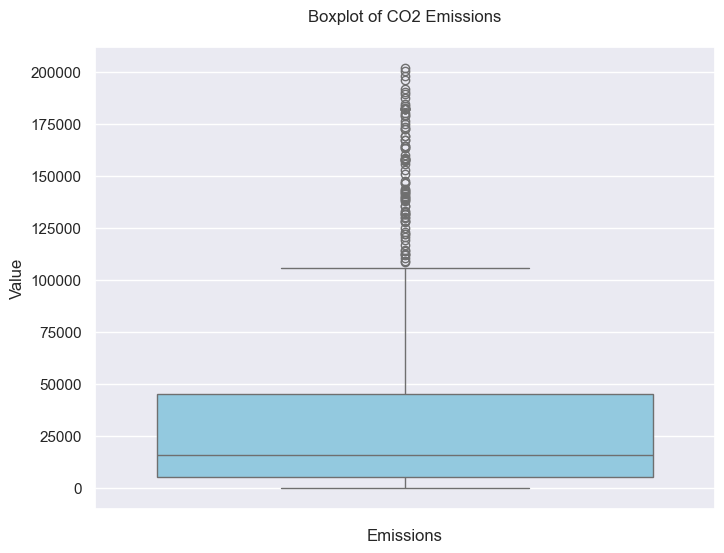

Displaying the outlier found in dataset CO2 Emission per capita metrics


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
86,36,Australia,2005,Emissions per capita (metric tons of carbon di...,18.1,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
87,36,Australia,2010,Emissions per capita (metric tons of carbon di...,17.8,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
88,36,Australia,2015,Emissions per capita (metric tons of carbon di...,16.0,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
89,36,Australia,2018,Emissions per capita (metric tons of carbon di...,15.7,Data refer to fiscal years beginning 1 July.;E...,"International Energy Agency, IEA World Energy ..."
128,48,Bahrain,1975,Emissions per capita (metric tons of carbon di...,19.6,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2107,784,United Arab Emirates,2020,Emissions per capita (metric tons of carbon di...,18.3,NaN,"International Energy Agency, IEA World Energy ..."
2148,840,United States of America,1975,Emissions per capita (metric tons of carbon di...,20.2,Including overseas territories.,"International Energy Agency, IEA World Energy ..."
2149,840,United States of America,1985,Emissions per capita (metric tons of carbon di...,18.9,Including overseas territories.,"International Energy Agency, IEA World Energy ..."
2150,840,United States of America,2005,Emissions per capita (metric tons of carbon di...,19.3,Including overseas territories.,"International Energy Agency, IEA World Energy ..."


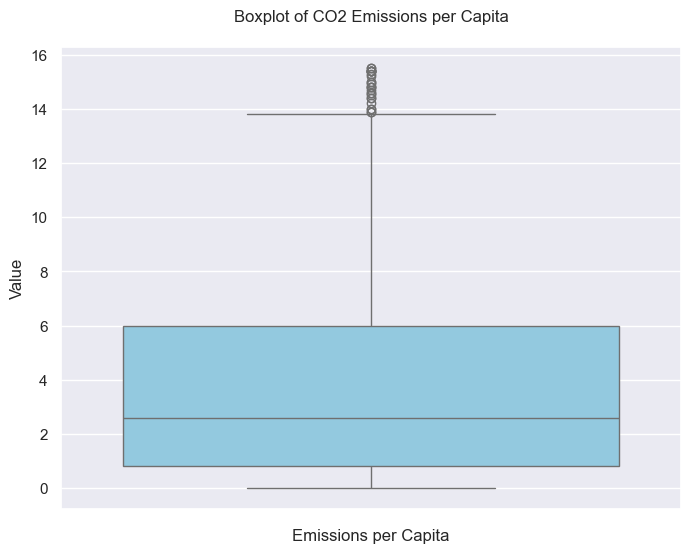

In [23]:
#Checking for missing value in CO2 dataset
CO2_NaN = CO2_df.isnull().sum()
print(CO2_NaN)

# Calculate IQR for 'Value' column in Value_emission
Q1 = Value_emission['Value'].quantile(0.25)
Q3 = Value_emission['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_emissions = Value_emission[(Value_emission['Value'] < lower_bound) | (Value_emission['Value'] > upper_bound)]

# Display the outliers
print('Displaying the outlier found in dataset CO2 Emission metrics')
display(outliers_emissions)

# Handle outliers and plot
Value_emission['Value'] = np.where((Value_emission['Value'] < lower_bound) | (Value_emission['Value'] > upper_bound), np.nan, Value_emission['Value'])

# Visualize the boxplot after handling outliers
print('Employee')
plt.figure(figsize=(8, 6))
sns.boxplot(y=Value_emission['Value'], color='skyblue')
plt.title("Boxplot of CO2 Emissions\n")
plt.xlabel("Emissions")
plt.ylabel("Value")
plt.show()

# Calculate IQR for 'Value' column in Value_capita
Q1 = Value_capita['Value'].quantile(0.25)
Q3 = Value_capita['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_emissions1 = Value_capita[(Value_capita['Value'] < lower_bound) | (Value_capita['Value'] > upper_bound)]

# Display the outliers
print('Displaying the outlier found in dataset CO2 Emission per capita metrics')
display(outliers_emissions1)

# Handle outliers
Value_capita['Value'] = np.where((Value_capita['Value'] < lower_bound) | (Value_capita['Value'] > upper_bound), np.nan, Value_capita['Value'])

# Visualizing and boxplot for Emission per capita
plt.figure(figsize=(8, 6))
sns.boxplot(y=Value_capita['Value'], color='skyblue')
plt.title("Boxplot of CO2 Emissions per Capita\n")
plt.xlabel("Emissions per Capita")
plt.ylabel("Value")
plt.show()


The code first checks for missing values in the CO2 dataset and prints the count of missing values for each column. The 'Footnotes' column has 2008 missing values, but it is not addressed as it doesn't conflict with other attributes for the given task. The focus is then on handling outliers in the 'Value' column of both CO2 emissions and CO2 emissions per capita.

For CO2 emissions, the Interquartile Range (IQR) is calculated, and lower and upper bounds are defined. Any values falling outside these bounds are identified as outliers and displayed. The outliers are then handled by replacing them with NaN values. A boxplot is visualized to showcase the distribution of CO2 emissions after handling outliers.

The same process is repeated for CO2 emissions per capita, where the IQR is calculated, outliers are identified and displayed, and the outliers are subsequently replaced with NaN values. Another boxplot is generated to visualize the distribution of CO2 emissions per capita after outlier handling.

The analysis indicates that the 'Value' column in both CO2 emissions and CO2 emissions per capita contains outliers, which are then appropriately addressed. The resulting boxplots provide a clear overview of the distribution of values, aiding in the identification and treatment of potential anomalies in the dataset.

### 5.e) Determining the trends, patterns, and relationships among the data with aid of example

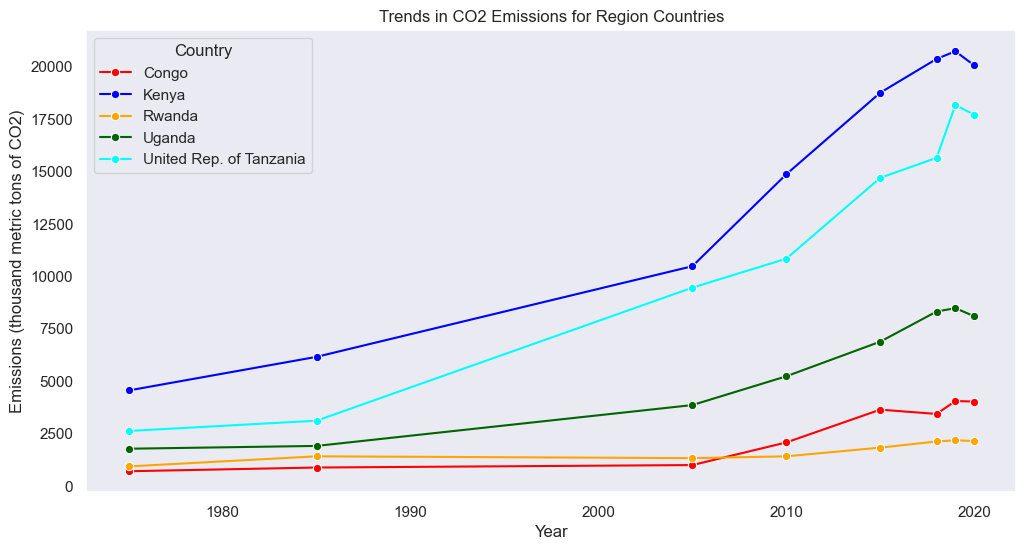

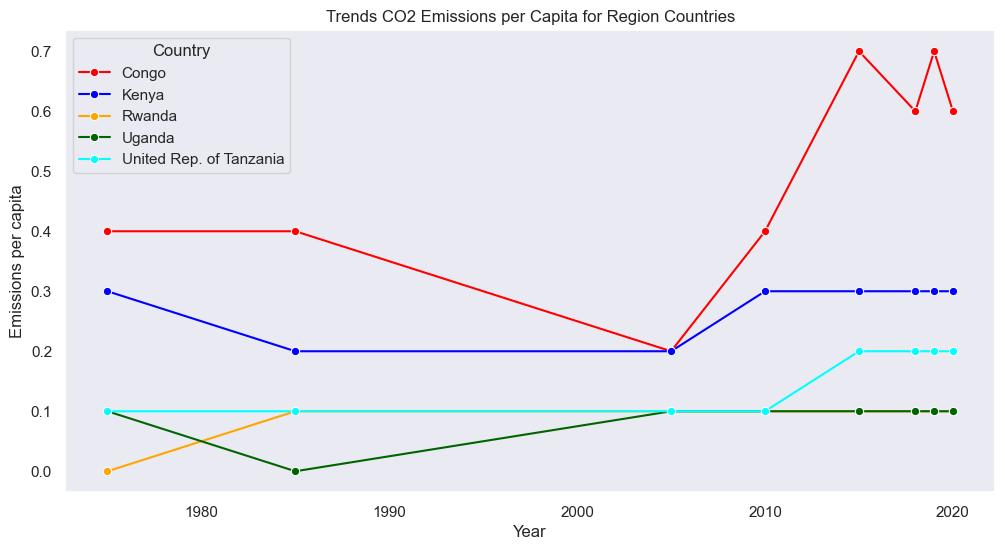

In [24]:
"""Determining the trends and the relationship between CO2 Emission taking example of 5 country of the Region
   and plot the timeseries of this country"""

Element = ['Rwanda', 'Kenya', 'United Rep. of Tanzania', 'Uganda', 'Congo']
Extract_countries = CO2_df[CO2_df['Unnamed: 1'].isin(Element)]

# Plot trends of CO2 country's Emission
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Year', y = Value_emission['Value'], hue = 'Unnamed: 1', data = Extract_countries, marker = 'o', palette = ['red', 'blue','orange', 'darkgreen', 'cyan'] )
plt.title('Trends in CO2 Emissions for Region Countries')
plt.xlabel('Year')
plt.ylabel('Emissions (thousand metric tons of CO2)')
plt.legend(title = 'Country')
plt.grid()
plt.show()

# Plot trends CO2 country's Emission per capita
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Year', y = Value_capita['Value'], hue = 'Unnamed: 1', data = Extract_countries, marker = 'o', palette = ['red', 'blue','orange', 'darkgreen', 'cyan'])
plt.title('Trends CO2 Emissions per Capita for Region Countries')
plt.xlabel('Year')
plt.ylabel('Emissions per capita')
plt.legend(title = 'Country')
plt.grid()
plt.show()


The presented code aims to explore and understand the trends in CO2 emissions for a subset of countries within the specified region, namely Rwanda, Kenya, United Rep. of Tanzania, Uganda, and Congo. Two distinct line plots are generated to visualize the trends in both total CO2 emissions (thousand metric tons of CO2) and CO2 emissions per capita (metric tons of CO2) over the years for these countries.

In the graph depicting CO2 emissions, it's evident that Kenya exhibits notably higher CO2 emissions compared to the other countries in the region. Over time, Kenya's emissions show a rising trend, reflecting potential growth and industrial development. On the other hand, Rwanda and Congo display relatively lower CO2 emissions, suggesting a variance in the industrialization levels among these countries.

Examining the graph for CO2 emissions per capita, there is a distinctive pattern in the region. Congo stands out with a significant increase in CO2 emissions per capita over the years, indicating a potentially rapid industrialization or energy consumption per person. In contrast, Rwanda and Uganda demonstrate lower CO2 emissions per capita, suggesting a more sustainable or less carbon-intensive development trajectory.

This study shows trends in both total CO2 emissions and emissions per capita within a regional context. The variations observed among the countries highlight potential differences in their economic development, industrialization pace, and the adoption of cleaner technologies. Such analyses are crucial for informed policymaking and sustainable development strategies tailored to the unique characteristics of each country.

### 5.f) Answer the  preliminary questions

In [25]:
# read the data and encofing in Latin-1 font
data = pd.read_csv("SYB66_310_202310_Carbon Dioxide Emission Estimates.csv",index_col=0, encoding='latin-1',skiprows=1, sep=",")
data

,Unnamed: 1,Year,Series,Value,Footnotes,Source
Region/Country/Area,,,,,,
8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980",NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975",NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...
716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."


In [26]:
# rename unnamed column to country

data = data.rename(columns={'Unnamed: 1': 'Country'})
data['Value'] = data['Value'].str.replace(',', '').astype(float)
data


,Country,Year,Series,Value,Footnotes,Source
Region/Country/Area,,,,,,
8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...
716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."


### 1. What  the countries  with highest carbon emission have in common in the earlier recorded year


Text(0.5, 1.0, 'Emission in 1975')

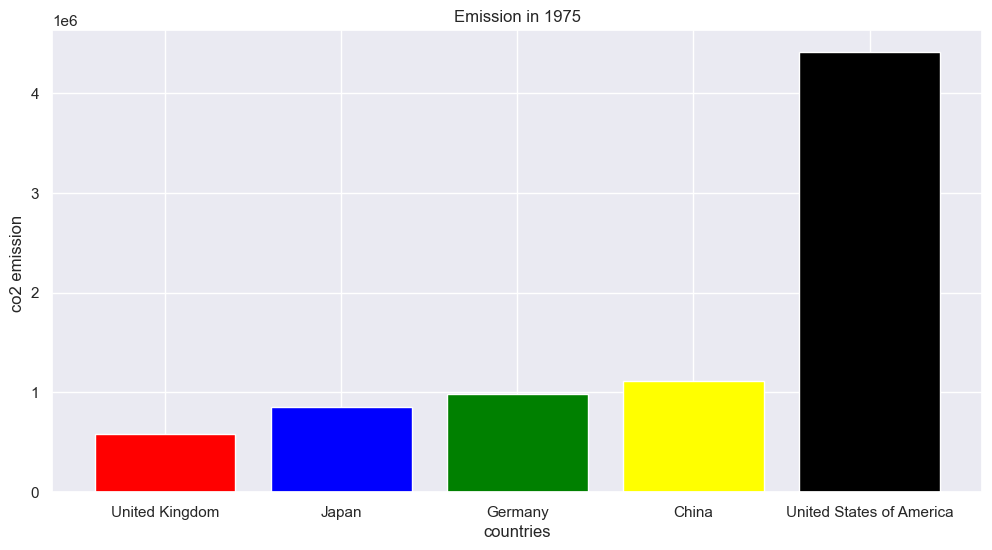

In [27]:
# sort the data from the oldest year to the recent recorded 
# get the earliest year that data were recorded 
year = min(data['Year'])
first_record = data.groupby(['Year'])
get_year = first_record.get_group(year)
# extract the countries with highest emmission the in earliest year that the record were made 
get_value = get_year.sort_values(by='Value').tail(5)

#plot the countries
plt.figure(figsize=(12,6))
plt.bar(get_value['Country'],get_value['Value'], color =['red','blue','green','yellow','black'])
plt.xlabel('countries')
plt.ylabel('co2 emission ')
plt.title('Emission in 1975')

## comparison of co2 emission in 2019 and 2020

Text(0.5, 1.0, 'Comparision of Co2 emission in 2019-2020')

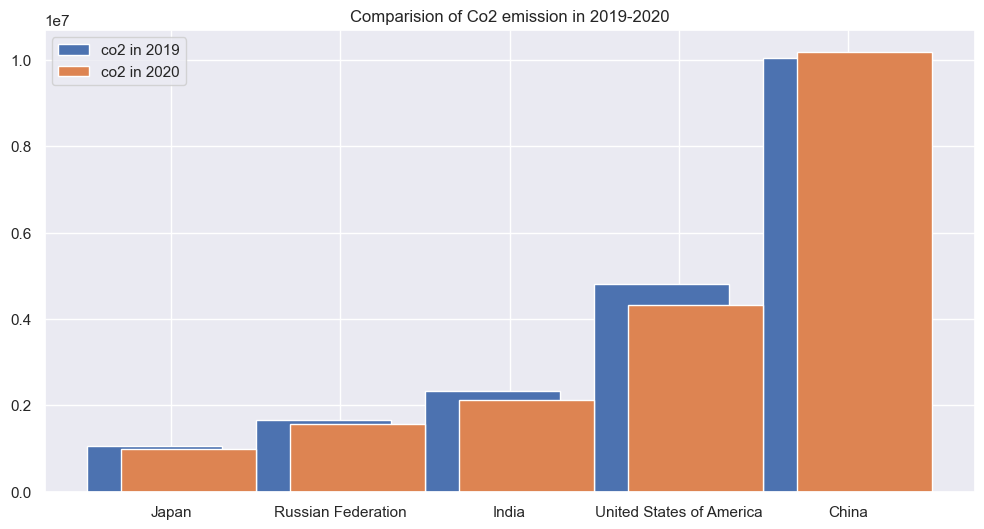

In [28]:
# group the Data per year 2020 and 2019
record = data.groupby(['Year'])
# extract the year 2019 and 2020
year_2019 = record.get_group(2019)
year_2020 = record.get_group(2020)
#sort the by the highest to the lowest 
sorted_2019 =year_2019.sort_values(by='Value').tail(5)
sorted_2020 =year_2020.sort_values(by='Value').tail(5)

# initialize the axis
plt.figure(figsize=(12,6))
x= np.arange(len(sorted_2019['Country']))
#PLOT
plt.bar(x - 0.1 , sorted_2019['Value'] , label ='co2 in 2019')
plt.bar(x + 0.1 , sorted_2020['Value'] , label ='co2 in 2020')
plt.xticks(x,sorted_2019['Country'] )
plt.legend()
plt.title('Comparision of Co2 emission in 2019-2020')


## 3. Lowest co2 ever, Emission per metric

In [29]:
# group data by Series
grouped_series = data.groupby(['Series'])
co2_per_capital = grouped_series.get_group('Emissions per capita (metric tons of carbon dioxide)')
co2_per_metric= grouped_series.get_group('Emissions (thousand metric tons of carbon dioxide)')
# group the Emission per capita by years
per_year = co2_per_metric.groupby(['Year'])
# create a list dictionary that will store the min emission per country for each year 
store= []
for x in data['Year']:
    min_percapita = per_year.get_group(x)
    get_min= min_percapita['Value'].idxmin()

    store.append(min_percapita.loc[get_min])

# convert the list of stored min emitter of co2 in the whole dataset into Dataframe
Min_emitters = pd.DataFrame(store)
# display the uniques countries that emitter less in the whole dataset
country = Min_emitters['Country'].unique()
for x in range (0,len(country)):
    print(f'The Country with the minumum co2 emission the whole Dataset is: {country[x]}')

The Country with the minumum co2 emission the whole Dataset is: Gibraltar
The Country with the minumum co2 emission the whole Dataset is: Equatorial Guinea


Text(0.5, 1.0, 'Emission average low emitter countries from 1975-2020')

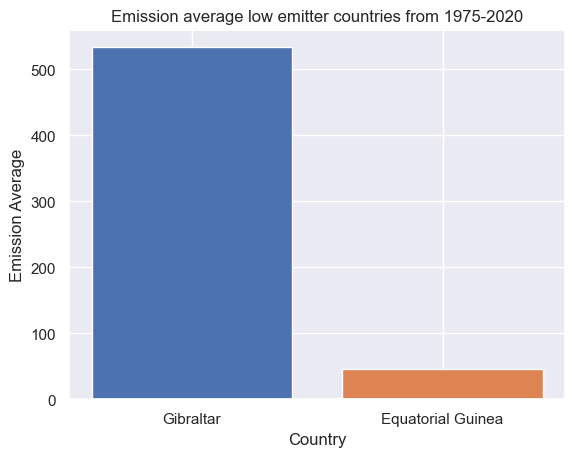

In [30]:
# group by country and plot the average of their emission in the whole dataset 
grouped_min_emitters = Min_emitters.groupby(['Country'])
# extract the grouped countries 
get_Gibraltat = grouped_min_emitters.get_group('Gibraltar')
get_eq_guinea = grouped_min_emitters.get_group('Equatorial Guinea')
# compare the two country by plotting the average of their emission fro 1975 -2020
#PLOT
plt.bar(country[0] , get_Gibraltat['Value'].mean() ) 
plt.bar(country[1], get_eq_guinea['Value'].mean() )
plt.xlabel('Country')
plt.ylabel('Emission Average')
plt.title('Emission average low emitter countries from 1975-2020')

In [31]:
data["Series"].unique()

array(['Emissions (thousand metric tons of carbon dioxide)',
       'Emissions per capita (metric tons of carbon dioxide)'],
      dtype=object)

### 3.Country with the lowest carbon emission in 2020 

In [32]:
gdf_filtered = data[(data['Year'] == 2020) & (data['Series'] == 'Emissions per capita (metric tons of carbon dioxide)')]
gdf_merged = gdf_filtered.merge(data, on='Year', suffixes=('_sorted', '_original'))

gdf_sorted = gdf_merged.sort_values(by='Value_original', ascending=False)

gdf_unique = gdf_sorted.drop_duplicates(subset=['Year', 'Value_original'])

gdf_low_emitter = gdf_unique[['Country_sorted', 'Series_original', 'Value_original','Year']]
gdf_low_emitter_sorted = gdf_low_emitter.sort_values(by='Value_original', ascending=True)

gdf_low_emitter_sorted.reset_index(inplace=True)

data_per_capita = gdf_low_emitter_sorted.head(79)
data_per_capita
data_per_capita

,index,Country_sorted,Series_original,Value_original,Year
0,27487,Nepal,Emissions per capita (metric tons of carbon di...,0.0,2020
1,21947,Kuwait,Emissions per capita (metric tons of carbon di...,0.1,2020
2,40613,Uganda,Emissions per capita (metric tons of carbon di...,0.2,2020
3,37291,Suriname,Emissions per capita (metric tons of carbon di...,0.3,2020
4,5659,Bulgaria,Emissions per capita (metric tons of carbon di...,0.4,2020
...,...,...,...,...,...
74,6833,Chile,Emissions per capita (metric tons of carbon di...,18.3,2020
75,1507,Australia,Emissions per capita (metric tons of carbon di...,18.9,2020
76,27521,Nepal,Emissions per capita (metric tons of carbon di...,19.0,2020
77,18325,Indonesia,Emissions per capita (metric tons of carbon di...,21.0,2020


## 4. Emmitter per capita

Text(0, 0.5, 'Amount of emission per capita')

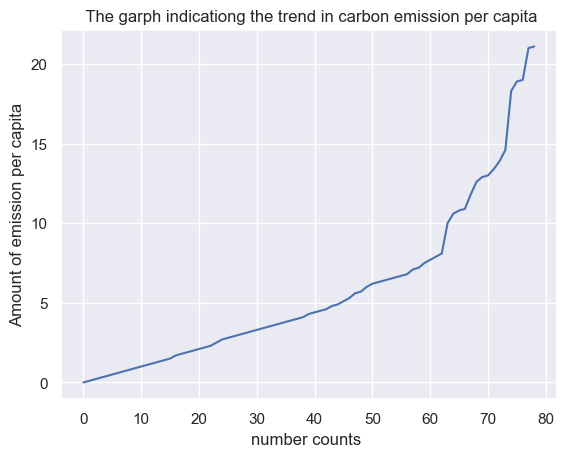

In [33]:
plt.plot(data_per_capita['Value_original'])
plt.title(" The garph indicationg the trend in carbon emission per capita")
plt.xlabel("number counts ")
plt.ylabel("Amount of emission per capita")

In [34]:
Low_emitter_per_capita = data[data['Series']=="Emissions (thousand metric tons of carbon dioxide)"]
Low_emitter_per_capita

,Country,Year,Series,Value,Footnotes,Source
Region/Country/Area,,,,,,
8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN,"International Energy Agency, IEA World Energy ..."
8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...
716,Zimbabwe,2010,Emissions (thousand metric tons of carbon diox...,11666.0,NaN,"International Energy Agency, IEA World Energy ..."
716,Zimbabwe,2015,Emissions (thousand metric tons of carbon diox...,14067.0,NaN,"International Energy Agency, IEA World Energy ..."
716,Zimbabwe,2018,Emissions (thousand metric tons of carbon diox...,13300.0,NaN,"International Energy Agency, IEA World Energy ..."


## 5. Emitter per Metric tons (Country)

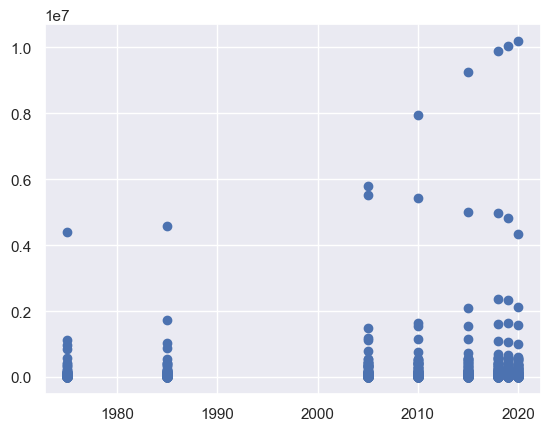

In [35]:
plt.scatter(Low_emitter_per_capita["Year"],Low_emitter_per_capita["Value"])

# 7) Time series data for carbon emission

Text(0.5, 1.0, ' The correspondence of the Value of co2 emmision over the time ')

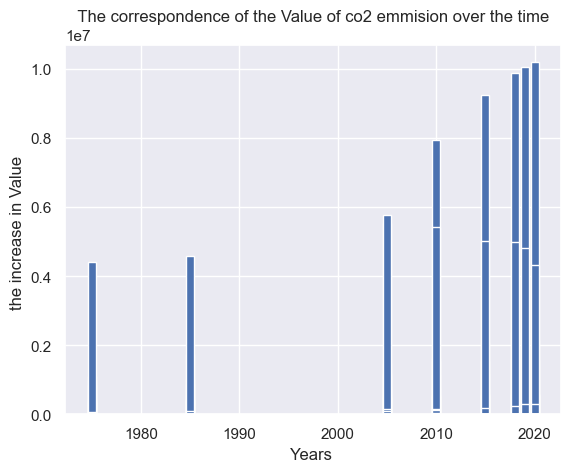

In [36]:
plt.bar(data["Year"],data["Value"])
plt.xlabel("Years ")
plt.ylabel("the increase in Value ")
plt.title(" The correspondence of the Value of co2 emmision over the time ")